# Moments (invariant)

Moments can be used to describe, characterize, and quantify the shape of an object in an image, such as  hu moments.

Hu moments are normally extracted from the outline of an object in an image. By describing the outline (silhouette ) of an object, we are able to extract a shape feature vector (i.e. a set of numerical values) to represent the shape of the object.

TO compare or match two objects, we may calculate a similarity metric of their corresponding vectors 



In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

Download the dataset from this link, and upload them un compressed to Colab environment: https://github.com/mymehio/hu_moments_matching/raw/master/objects_moments.zip


In [2]:
!wget https://github.com/mymehio/hu_moments_matching/raw/master/objects_moments.zip
!unzip objects_moments.zip

--2023-03-17 16:11:27--  https://github.com/mymehio/hu_moments_matching/raw/master/objects_moments.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mymehio/hu_moments_matching/master/objects_moments.zip [following]
--2023-03-17 16:11:27--  https://raw.githubusercontent.com/mymehio/hu_moments_matching/master/objects_moments.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5714 (5.6K) [application/zip]
Saving to: ‘objects_moments.zip’

objects_moments.zip 100%[===================>]   5.58K  --.-KB/s    in 0s      

2023-03-17 16:11:27 (41.4 MB/s) - ‘objects_moments.zip’ saved [5714/5714]

## Read images

Now we have to read each image and stack all them in array of images, as following: 
- Read image as greyscale
- Threshold each image to have a binary image (each pixel value bigger 128 must be 255, else 0)
- Each binary image is tocked in a new array of images 
- Display each image


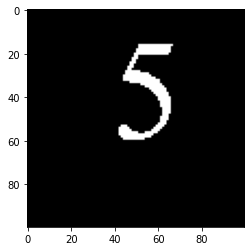

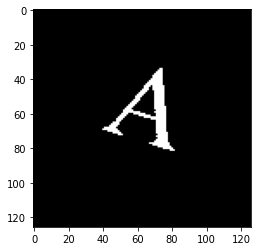

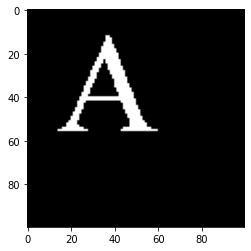

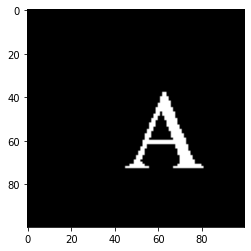

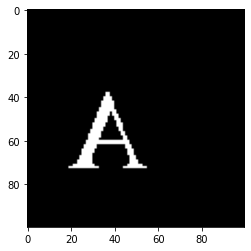

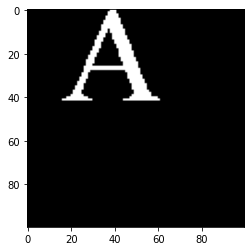

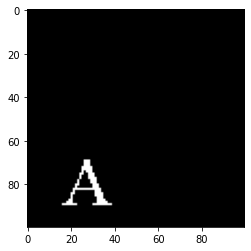

In [3]:
# Define the directory path
directory = "objects_moments"

# Get all image filenames in the directory
filenames = [img for img in os.listdir(directory) if img.endswith(".jpg") or img.endswith(".png")]

filenames.sort()
# Read the images using OpenCV
images = []
for filename in filenames:
    path = os.path.join(directory, filename) # Complete the path to the image
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    # Threshold image to convert it to binary
    _,im = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    images.append(im)
    plt.imshow(im, cmap='gray') # Show the image
    plt.show()

# Moment Extraction

After displaying images, you will see that two different objects are to be studeied. Object "A" has different shapes with few variations (scale, rotation, translation, mirror). The idea is to calculate the Hu moments and to verfy that all "A" objects have mostly the similar features although they suffered of variation. This is to conclude that hu moments features are invariant ==> robust features

## How calculate Moments
For each image you have to calculate the Hu moment in two steps. 

1. Opencv propose monments() function, it needs a binary image, and return a vector of central moments, that are not enough invariant as seen in the lecture, 
2. Therefore, to calculate the hu moments, you need HuMoments() function, that needs as argument the vector returned by the previous function.



```
for each image in images
  moments = cv2.moments(img)
  huMoments = cv2.HuMoments(moments)
```




In [4]:
# Calculate Moments
data = []
d = []
columns = ["Image", "H0", "H1", "H2", "H3", "H4", "H5", "H6" ]
c = 0
for im in images:
  moments = cv2.moments(im)
  # Calculate Hu Moments
  #d = [cv2.imread(os.path.join(directory, filenames[i]),0)]
  d = [os.path.join(directory, filenames[c])]
  c = c + 1 
  huMoments = cv2.HuMoments(moments)
  for i in range(0,7):
    #print(huMoments[i])
    d.append(huMoments[i])
  data.append(d)

ddata = np.vstack(data)
# Create the dataframe
df = pd.DataFrame(ddata, columns=columns)

/usr/local/lib/python3.9/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


In [5]:
df.head(10)

,Image,H0,H1,H2,H3,H4,H5,H6
0,objects_moments/50.jpg,[0.0026049513239877605],[2.8945909209626795e-06],[5.776271226112988e-10],[5.769892481033537e-10],[3.235016319521174e-19],[7.024565051640338e-13],[7.938942310881115e-20]
1,objects_moments/50r.jpg,[0.001996571510613796],[1.9239356694616604e-07],[5.657699618525041e-09],[2.4878751268224434e-10],[6.810917167815483e-20],[5.022897197189354e-15],[2.8719800859359466e-19]
2,objects_moments/A0.jpg,[0.0019711635888352134],[1.5913932425091865e-07],[5.556455086190804e-09],[2.518528039697743e-10],[3.7363872777890874e-20],[1.8291086849813543e-14],[2.95581138945713e-19]
3,objects_moments/A1.jpg,[0.0018550155237481948],[1.8787854184464602e-07],[4.559401689009201e-09],[1.484995778375743e-10],[5.869329934177621e-20],[-1.3923044707727505e-14],[1.0717234512370819e-19]
4,objects_moments/A1m.jpg,[0.0018608457061052904],[1.8135425930080865e-07],[4.659010412688531e-09],[1.569651253844086e-10],[7.80254359980312e-20],[-1.345309655735741e-14],[-1.0922403944154982e-19]
5,objects_moments/A2.jpg,[0.0019266332670131313],[1.3223325987760803e-07],[4.959373409497883e-09],[2.736418841893414e-10],[3.868471756126311e-20],[9.51156727222553e-15],[3.164212399274593e-19]
6,objects_moments/A3.jpg,[0.002088260116462022],[2.154997272174348e-07],[6.960972952769783e-09],[2.5761213739643674e-10],[2.8510928592567524e-19],[-5.748544809476887e-14],[1.9421305075974375e-19]


### Note that hu[0] is not comparable in magnitude as hu[6]. We can use use a log transform given below to bring them in the same range

image.png





```
huMoments[i] = -1* m.copysign(1.0, huMoments[i]) * m.log10(abs(huMoments[i]))   
```



In [6]:
import math as m

# Calculate Moments
data = []
d = []
columns = ["Image", "H0", "H1", "H2", "H3", "H4", "H5", "H6" ]
c = 0
for im in images:
  moments = cv2.moments(im)
  # Calculate Hu Moments
  #d = [cv2.imread(os.path.join(directory, filenames[i]),0)]
  d = [os.path.join(directory, filenames[c])]
  c = c + 1 
  huMoments = cv2.HuMoments(moments)
  for i in range(0,7):
    #print(huMoments[i])
    huMoments[i] = -1* m.copysign(1.0, huMoments[i]) * m.log10(abs(huMoments[i]))  
    d.append(huMoments[i])
  data.append(d)

ddata = np.vstack(data)
# Create the dataframe
df = pd.DataFrame(ddata, columns=columns)

/usr/local/lib/python3.9/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Lets display the results of moments values within dataframe

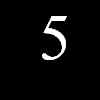

H0     [2.584200387497287]
H1     [5.538412804413907]
H2     [9.238352422564681]
H3      [9.23883227962224]
H4     [18.49012352412662]
H5    [12.153380561319029]
H6    [19.100237353888467]
Name: 0, dtype: object


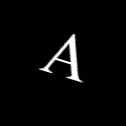

H0     [2.699715130193516]
H1    [6.7158094535377595]
H2     [8.247360114051181]
H3     [9.604171421848159]
H4    [19.166794401435112]
H5    [14.299045710383208]
H6    [18.541818575780056]
Name: 1, dtype: object


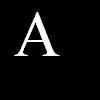

H0    [2.7052773316920056]
H1     [6.798222490404135]
H2     [8.255202191781146]
H3     [9.598853209619367]
H4    [19.427548115340805]
H5    [13.737760488134683]
H6     [18.52932328175602]
Name: 2, dtype: object


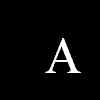

H0     [2.7316524516284666]
H1      [6.726122819104509]
H2       [8.34109214422374]
H3      [9.828274780980253]
H4      [19.23141147669101]
H5    [-13.856265782313567]
H6     [18.969917266038973]
Name: 3, dtype: object


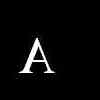

H0     [2.7302896353405095]
H1      [6.741472240088424]
H2      [8.331706318921146]
H3      [9.804196828708875]
H4       [19.1077637958634]
H5    [-13.871177740718073]
H6    [-18.961681765955255]
Name: 4, dtype: object


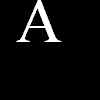

H0     [2.715200945059146]
H1      [6.87865929549652]
H2     [8.304573190845996]
H3     [9.562817427857864]
H4    [19.412460569596938]
H5    [14.021747916122703]
H6     [18.49973437197054]
Name: 5, dtype: object


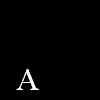

H0     [2.6802154060011225]
H1      [6.666553275238924]
H2      [8.157330053710215]
H3      [9.589033679044684]
H4     [18.544988637616513]
H5    [-13.240442078996914]
H6      [18.71172158965715]
Name: 6, dtype: object


In [7]:
from IPython.display import Image
from IPython.display import display
# Loop through the rows of the dataframe
for index, row in df.iterrows():
    # Display the image
    display(Image(row["Image"]))
    print(row[1:])

In [8]:
# Converting links to html tags
def path_to_image_html(path):
    return '<img src="'+ path + '" width="100" >' 

In [9]:
from IPython.core.display import HTML, display
display(HTML(df.to_html('results.html',escape=False,formatters=dict(Image=path_to_image_html))))
# please download the generated html page with the directory of images to see results properly 

<IPython.core.display.HTML object>

### please download the generated html page with the directory of images to see results properly 

In [10]:
from IPython.display import HTML

# Load the contents of the results.html file
with open('results.html', 'r') as f:
    html_contents = f.read()
# Display the contents in the notebook
HTML(html_contents)

,Image,H0,H1,H2,H3,H4,H5,H6
0,,[2.584200387497287],[5.538412804413907],[9.238352422564681],[9.23883227962224],[18.49012352412662],[12.153380561319029],[19.100237353888467]
1,,[2.699715130193516],[6.7158094535377595],[8.247360114051181],[9.604171421848159],[19.166794401435112],[14.299045710383208],[18.541818575780056]
2,,[2.7052773316920056],[6.798222490404135],[8.255202191781146],[9.598853209619367],[19.427548115340805],[13.737760488134683],[18.52932328175602]
3,,[2.7316524516284666],[6.726122819104509],[8.34109214422374],[9.828274780980253],[19.23141147669101],[-13.856265782313567],[18.969917266038973]
4,,[2.7302896353405095],[6.741472240088424],[8.331706318921146],[9.804196828708875],[19.1077637958634],[-13.871177740718073],[-18.961681765955255]
5,,[2.715200945059146],[6.87865929549652],[8.304573190845996],[9.562817427857864],[19.412460569596938],[14.021747916122703],[18.49973437197054]
6,,[2.6802154060011225],[6.666553275238924],[8.157330053710215],[9.589033679044684],[18.544988637616513],[-13.240442078996914],[18.71172158965715]




# Assignment
We can then compare two feature vectors using a similarity metric or distance function to determine how “similar” the shapes are.

- Consider one object with multiple images. Choose your reference to compare with, then write a code to do the following steps: 
- Compute the hu moments of each
- Find a similarity metric ( one at least, multiple is good )
- Use the proposed metric(s) to comare all other images with the reference one.
- Explain the choice of metric 
- Try your code with new objects of your choice 


Don't forget to explain the term 


```
huMoments[i] = -1* m.copysign(1.0, huMoments[i]) * m.log10(abs(huMoments[i]))   
```




In [11]:
# Set the reference image
ref_img = df.iloc[0, 1:].values.astype(float)

# Compute the distance between the Hu moments of the reference image and each of the other images
df['distance'] = df.apply(lambda row: m.dist(row[1:], ref_img), axis=1)
df_sorted = df.sort_values('distance')
print(df_sorted)

                     Image                    H0                    H1  \
0   objects_moments/50.jpg   [2.584200387497287]   [5.538412804413907]   
2   objects_moments/A0.jpg  [2.7052773316920056]   [6.798222490404135]   
5   objects_moments/A2.jpg   [2.715200945059146]    [6.87865929549652]   
1  objects_moments/50r.jpg   [2.699715130193516]  [6.7158094535377595]   
6   objects_moments/A3.jpg  [2.6802154060011225]   [6.666553275238924]   
3   objects_moments/A1.jpg  [2.7316524516284666]   [6.726122819104509]   
4  objects_moments/A1m.jpg  [2.7302896353405095]   [6.741472240088424]   

                    H2                   H3                    H4  \
0  [9.238352422564681]   [9.23883227962224]   [18.49012352412662]   
2  [8.255202191781146]  [9.598853209619367]  [19.427548115340805]   
5  [8.304573190845996]  [9.562817427857864]  [19.412460569596938]   
1  [8.247360114051181]  [9.604171421848159]  [19.166794401435112]   
6  [8.157330053710215]  [9.589033679044684]  [18.5449886376165

In [12]:
# Print out the distances to the reference image
distances = df['distance']

for i, dist in enumerate(distances):
    print(f"Distance to image {i+1}: {dist}")

Distance to image 1: 0.0
Distance to image 2: 2.8086898919912247
Distance to image 3: 2.532379713258727
Distance to image 4: 26.070157455114522
Distance to image 5: 46.14086193074032
Distance to image 6: 2.737231788147011
Distance to image 7: 25.44746260740685


In [13]:
# Structural Similarity Index (SSIM). It is a perceptual metric that measures the similarity between two images in terms of luminance, contrast, and structure. 
#The SSIM takes values between -1 and 1, where 1 means perfect similarity.

from skimage.metrics import structural_similarity as ssim

# Convert all columns except the first one to float type
df.iloc[:,1:] = df.iloc[:,1:].astype(float)

# Define the SSM metric function
def ssm(x, y):
    return np.sum(np.minimum(x, y)) / np.sum(np.minimum(x, y).shape)

# Compute the similarity between the Hu moments of the reference image and each of the other images
ref_img = df.iloc[0, 1:].astype(float)
df['similarity'] = df.iloc[:, 1:].apply(lambda row: ssm(row.astype(float), ref_img), axis=1)
df_sorted = df.sort_values('similarity', ascending=False)
print(df_sorted)

                     Image        H0        H1        H2        H3         H4  \
0   objects_moments/50.jpg  2.584200  5.538413  9.238352  9.238832  18.490124   
5   objects_moments/A2.jpg  2.715201  6.878659  8.304573  9.562817  19.412461   
1  objects_moments/50r.jpg  2.699715  6.715809  8.247360  9.604171  19.166794   
2   objects_moments/A0.jpg  2.705277  6.798222  8.255202  9.598853  19.427548   
6   objects_moments/A3.jpg  2.680215  6.666553  8.157330  9.589034  18.544989   
3   objects_moments/A1.jpg  2.731652  6.726123  8.341092  9.828275  19.231411   
4  objects_moments/A1m.jpg  2.730290  6.741472  8.331706  9.804197  19.107764   

          H5         H6   distance  similarity  
0  12.153381  19.100237   0.000000    9.542942  
5  14.021748  18.499734   2.737232    9.351157  
1  14.299046  18.541819   2.808690    9.349266  
2  13.737760  18.529323   2.532380    9.348684  
6 -13.240442  18.711722  25.447463    6.185022  
3 -13.856266  18.969917  26.070157    6.163289  
4 -13.87

### please download the generated html page with the directory of images to see results properly 

In [14]:
from IPython.core.display import display, HTML
display(HTML('/content/results.html'))

,Image,H0,H1,H2,H3,H4,H5,H6
0,,[2.584200387497287],[5.538412804413907],[9.238352422564681],[9.23883227962224],[18.49012352412662],[12.153380561319029],[19.100237353888467]
1,,[2.699715130193516],[6.7158094535377595],[8.247360114051181],[9.604171421848159],[19.166794401435112],[14.299045710383208],[18.541818575780056]
2,,[2.7052773316920056],[6.798222490404135],[8.255202191781146],[9.598853209619367],[19.427548115340805],[13.737760488134683],[18.52932328175602]
3,,[2.7316524516284666],[6.726122819104509],[8.34109214422374],[9.828274780980253],[19.23141147669101],[-13.856265782313567],[18.969917266038973]
4,,[2.7302896353405095],[6.741472240088424],[8.331706318921146],[9.804196828708875],[19.1077637958634],[-13.871177740718073],[-18.961681765955255]
5,,[2.715200945059146],[6.87865929549652],[8.304573190845996],[9.562817427857864],[19.412460569596938],[14.021747916122703],[18.49973437197054]
6,,[2.6802154060011225],[6.666553275238924],[8.157330053710215],[9.589033679044684],[18.544988637616513],[-13.240442078996914],[18.71172158965715]
